<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA EXTRACTION

---

In [ ]:
sleep = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/Student_performance.csv")

In [ ]:
sleep.head(2)

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0


In [ ]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


DATA ANALYSIS

---

In [ ]:
sns.set()

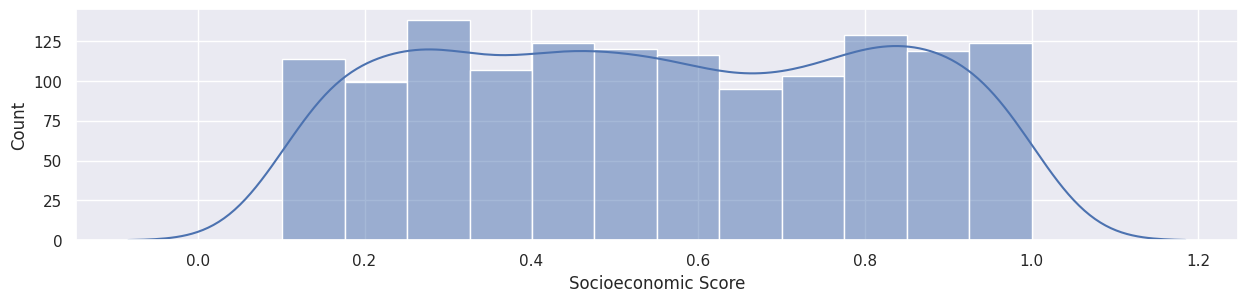

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(sleep['Socioeconomic Score'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

In [ ]:
corr = sleep.corr()

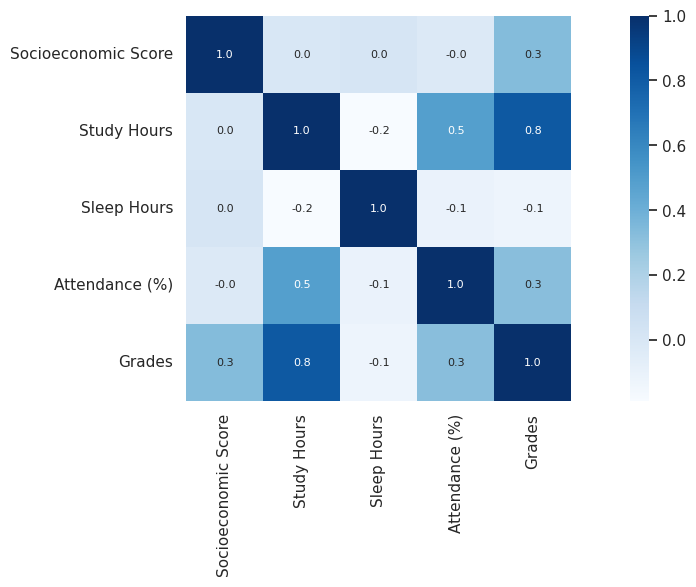

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

MACHINE LEARNING MODEL BUILDING

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X = sleep.drop(columns=['Grades'], axis=1)
y = sleep['Grades']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION

---

In [ ]:
y_pred_train = rg.predict(X_train)
y_pred_test = rg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 Score for Training Data: {r2_train}")
print(f"R2 Score for Testing Data: {r2_test}")

R2 Score for Training Data: 0.9969222276705905
R2 Score for Testing Data: 0.9806124169610629


In [ ]:
importance = rg.feature_importances_.round(2)*100
columns = X.columns
feature_importance = pd.DataFrame({'feature':importance,
                                   'columns': columns}).sort_values(by='feature', ascending=False)

print("Feature Importance")
print(feature_importance)

Feature Importance
   feature              columns
1     73.0          Study Hours
0     25.0  Socioeconomic Score
2      1.0          Sleep Hours
3      1.0       Attendance (%)
